In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('final-employee-ds.csv')

df.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


### **Ans to the question number 1**

In [7]:
trhr = np.array(df['TrainingHours'], dtype=float)

trhr_mean = np.mean(trhr)
trhr_std = np.std(trhr)

print("Mean value:", trhr_mean)
print("Std value:", trhr_std)

Mean value: 24.19
Std value: 13.842467265628624


### **Ans to the question number 2**

In [18]:
df['Salary'] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))

total_salary = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]['Salary'].sum()

print("Total Salary:", total_salary)


Total Salary: 1985775.5


### **Ans to the question number 3**

In [25]:
fltr_df = df[(df['Department'].isin(['IT', 'Finance'])) &
             (df['Age'].between(30, 45)) &
             (df['PerformanceScore'] > 88)]

fltr_df = fltr_df.sort_values(by='Salary', ascending=False)

fltr_df[['Name', 'Department', 'Salary', 'PerformanceScore']]


,Name,Department,Salary,PerformanceScore
94,Employee_95,IT,140386.0,94
88,Employee_89,Finance,126027.0,92
4,Employee_5,Finance,85543.0,97
32,Employee_33,IT,83919.0,98
55,Employee_56,Finance,49540.0,94


### **Ans to the question number 4**

In [33]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek'] * 4)

top_5_emp = df.nlargest(5, 'SalaryPerHour')

top_5_emp[['Name', 'SalaryPerHour']]

,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


### **Ans to the question number 5**

Text(0.5, 1.0, 'Count of employees in each Department, separated by Gender')

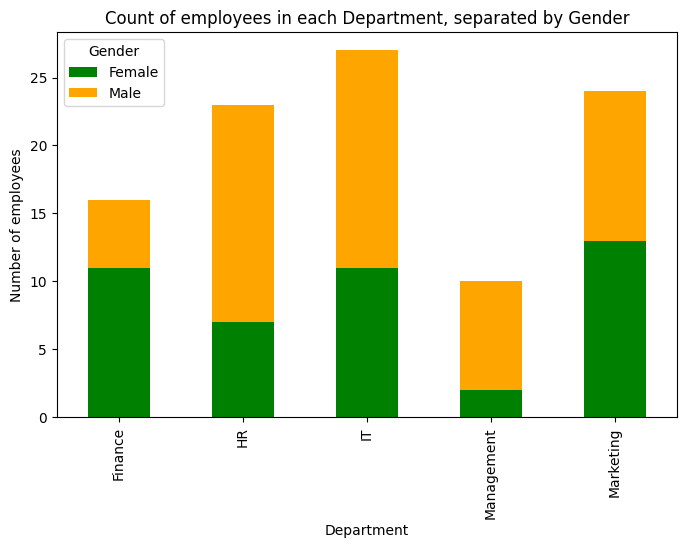

In [45]:
dept_gen = pd.crosstab(df['Department'], df['Gender'])

dept_gen.plot(kind='bar', stacked=True, color=['green','orange'], figsize=(8, 5))

plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.title('Count of employees in each Department, separated by Gender')